# Predicting a continuous variable using regressor models using KNN, XGBoost, and MLP
## Introduction

### Authored by:
#### Team Name : ELITE

Team Members:Sindhura Alla,Medha Alla,Ravindra Kumar Velidandi,Sai Mithil Sagi,Venkata Saipavan Lahar Sudrosh Kumar Atchutha,Sanjana Thinderu

Objective is to use regressor models using KNN, XGBoost, and MLPl to predict which model has better performnace using root sum of squared errors as evaluation metric.

## Step 1 - Importing the required packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

/Users/sindhura/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Step 2- Loading the required data

In [2]:
imp_df = pd.read_csv('/Users/sindhura/Materials/USF/Data Mining/isms6136/Assignment 8/week09-a8-data.csv')
imp_df.head(10)

,input,target
0,-7.30,2.451483e+05
1,-130.15,2.324013e+06
2,-106.01,9.672982e+05
3,-9.99,-3.043995e+05
4,-10.06,-1.013953e+06
5,-11.73,3.055883e+05
6,-14.25,-1.741598e+05
7,-39.65,1.386264e+05
8,-44.41,3.382260e+05
9,-102.22,6.748891e+05


### Step 2.2- Data Exploration

In [3]:
print(imp_df.columns)
print(imp_df.describe())
print(imp_df.info())
print(imp_df.value_counts())

Index(['input', 'target'], dtype='object')
             input        target
count  2000.000000  2.000000e+03
mean    103.306935 -3.130993e+05
std     100.608839  9.569853e+05
min    -215.340000 -5.231576e+06
25%      37.640000 -8.012161e+05
50%     103.450000 -3.182998e+05
75%     171.890000  1.324946e+05
max     495.860000  1.057182e+07
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   2000 non-null   float64
 1   target  2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB
None
input    target       
-215.34   1.057182e+07    1
 147.15  -9.785370e+05    1
 149.52  -6.250398e+05    1
 149.43  -1.284435e+05    1
 149.23  -1.390616e+05    1
                         ..
 59.75   -9.617942e+05    1
 59.39    2.363168e+05    1
 59.28    4.554690e+05    1
 59.27    2.142222e+04    1
 495.86  -5.231576e+06    1
Length: 2000, dtype: int64


In [4]:
imp_df.dtypes

input     float64
target    float64
dtype: object

## Step 3 - Split data into training and validation sets

#### Create the training set and the test set with a 70/30 split.

We've decided to utilize a training/test split of the data at 70% training and 30% testing. This percentage split ratio is inline with common practice for small to medium sized datasets, which this data represents. Moreover, we have decided not to do a three way data split, as we are only testing two models and we wish to allocated as much data as possible to training and validation steps.

In [5]:
X=imp_df.iloc[:,0:1].values
y=imp_df.iloc[:,1].values

In [6]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=11)

## Explore the training data

we are using scatter plot to understand the training data

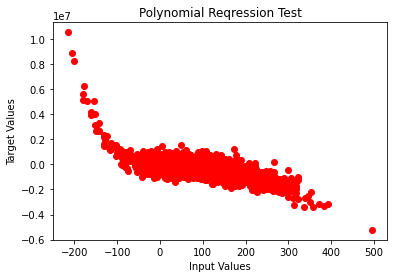

In [7]:
plt.scatter(train_X,train_y,color='red')
plt.title('Polynomial Reqression Test')
plt.xlabel('Input Values')
plt.ylabel('Target Values')
plt.show()

## Fit the data using a KNN regression model

In [8]:
%%time
%%capture --no-display

knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(train_X,train_y)

KNeighborsRegressor(n_neighbors=3)

CPU times: user 7.11 ms, sys: 3.81 ms, total: 10.9 ms
Wall time: 12.5 ms


In [9]:
%%time

y_pred = knn.predict(valid_X)

CPU times: user 4.11 ms, sys: 2.49 ms, total: 6.6 ms
Wall time: 5.95 ms


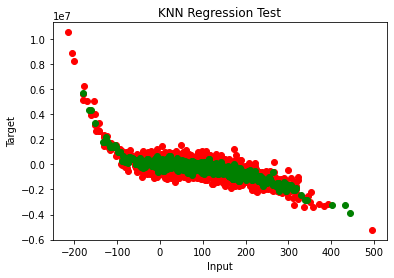

In [10]:
#X_grid=np.arange(min(train_X),max(train_X),0.1)
#X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(train_X,train_y,color='red')
plt.scatter(valid_X,y_pred,color='green')
plt.title('KNN Regression Test')
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

In [11]:
mean_squared_error(valid_y, y_pred)**(1/2)

589310.4164876111

## Fit the data using a XGBoost regression model

In [12]:
%%time
%%capture --no-display

xgboost = XGBRegressor(randome_state=11)
xgboost.fit(train_X,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             randome_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

CPU times: user 847 ms, sys: 121 ms, total: 968 ms
Wall time: 10.7 s


In [13]:
%%time
y_pred = xgboost.predict(valid_X)

CPU times: user 6.71 ms, sys: 3.01 ms, total: 9.72 ms
Wall time: 18.2 ms


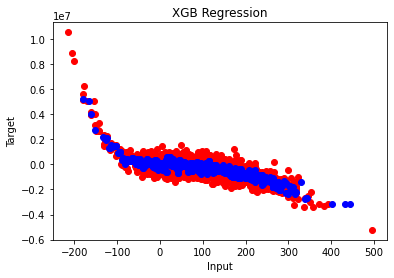

In [14]:
X_grid=np.arange(min(train_X),max(train_X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(train_X,train_y,color='red')
plt.scatter(valid_X,y_pred,color='blue')
plt.title('XGB Regression')
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

In [15]:
mean_squared_error(valid_y, y_pred)**(1/2)

582701.0523804177

## Neural Networks for regression

In [24]:
%%time

ann = MLPRegressor(hidden_layer_sizes=(8,3,2), max_iter=10000)
ann.fit(train_X,train_y)

CPU times: user 1min, sys: 574 ms, total: 1min 1s
Wall time: 1min 46s


MLPRegressor(hidden_layer_sizes=(8, 3, 2), max_iter=10000)

In [25]:
%%time
y_pred = ann.predict(valid_X)

CPU times: user 1.75 ms, sys: 1.39 ms, total: 3.14 ms
Wall time: 2.77 ms


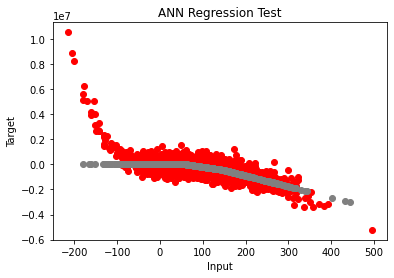

In [26]:
X_grid=np.arange(min(train_X),max(train_X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(train_X,train_y,color='red')
plt.scatter(valid_X,y_pred,color='grey')
plt.title('ANN Regression Test')
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

In [27]:
mean_squared_error(valid_y, y_pred)**(1/2)

689357.9807119798

## Summary of Results

* After doing the train, test split of the data and fitting the trained data into KNN, XGBOOST and Neural Network.
* The KNN and XGBoost fit data the best train/test split data while the Neural Networks took much longer time than the other two models. 
* When we observed at the graph of each model, KNN and XGBoost are indicating that they may be having a high standard error. 
* In neutral network graph,  very less standard deviation is observed as the mean squared error of Neural Networks is very less compared to the KNN and XGBOOST. 
* The KNN and XGBOOST models seem to be missing the underlying relationship. 
* The MLPRegression has done a good job at identifing the underlying relationship.